In [12]:
# loading all the tools (Python libraries) needed for this ML project.

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [4]:
# Example of loading data from a CSV file straight into the Pandas dataframe and then displaying the output

df = pd.read_csv("data/students.csv")
df.head()

,Index,"Height(Inches)""","""Weight(Pounds)"""
0,1,65.78,112.99
1,2,71.52,136.49
2,3,69.40,153.03
3,4,68.22,142.34
4,5,67.79,144.30


In [19]:
# Example of creating a dataset ("data") using code, loading it into the Pandas dataframe, then displaying the output

data = {
    'hours_studied': [1, 2, 3, 4, 5, 6, 7],
    'attendance': [0, 1, 1, 1, 1, 1, 1],
    'passed_exam': [0, 0, 0, 1, 1, 1, 1]
}
df = pd.DataFrame(data)
df.head()

,hours_studied,attendance,passed_exam
0,1,0,0
1,2,1,0
2,3,1,0
3,4,1,1
4,5,1,1


In [18]:
# Assigning specific column header names to either X or Y axis 
# X = what the model will use to make predictions.
# Y = what the model is trying to predict (pass [1] or fail [0]).

X = df[['hours_studied', 'attendance']]
y = df['passed_exam']

In [17]:
# For each X/Y axis, 30% of the data will be used for TESTING.  The rest will be used for TRAINING.
# "LogisticRegression" is the ML model being used for TRAINING.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

model = LogisticRegression()
model.fit(X_train, y_train)  # --- Commanding the model to learn the data using the learning method "fit"

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [16]:
# Test the model using the 30% TEST data before running it on the 70% TRAINING data
# With the "predict" method, X_test (hours_studied + attendance) is used to generate predictions for y_pred as (1 or 0) pass/fail results
# Use the "accuracy_score" function to determine how many predictions were correct.
# With the "accuracy_score" function we get a TOTAL % of times the y_test (real answers) match y_pred (machine's answer)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", accuracy)

Model Accuracy: 0.6666666666666666


In [20]:
# We want to get an answer for ONE specific scenerio
# This "predict" method allows 2 variable inputs for the 2 features (hours_studied, attendance) defined for this model.
# OUTER bracket = All students ... since nothing was listed
# INNER bracket = 5 hours (studied) ... 1 (attendance) 

# SCENERIO Will a student who studieERIO s 5 hours and attends class pass?
print("Prediction (1 = Pass, 0 = Fail):", model.predict([[5, 1]]))

Prediction (1 = Pass, 0 = Fail): [1]


/home/snitniuq/Documents/Projects/student-pass-predictor/venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [35]:
# Run a predict on the full set of data and show the output.
# Loop through the actual data values and predictions assocated with those data values. 
# Perform (tuple unpacking) on (X_all.values, predictions) into values for "row" and "result"
# Added an enumerate function to show a count of predictaions in the output.
# 

X_all = df[['hours_studied', 'attendance']]

predictions = model.predict(X_all)

for i, (row, result) in enumerate(zip(X_all.values, predictions), start=1):
    hours, attendance = row
    print(f"Prediction {i}: {'Pass' if result == 1 else 'Fail'} "
          f"(Hours Studied: {hours}, Attendance: {attendance})")

Prediction 1: Fail (Hours Studied: 1, Attendance: 0)
Prediction 2: Fail (Hours Studied: 2, Attendance: 1)
Prediction 3: Fail (Hours Studied: 3, Attendance: 1)
Prediction 4: Pass (Hours Studied: 4, Attendance: 1)
Prediction 5: Pass (Hours Studied: 5, Attendance: 1)
Prediction 6: Pass (Hours Studied: 6, Attendance: 1)
Prediction 7: Pass (Hours Studied: 7, Attendance: 1)


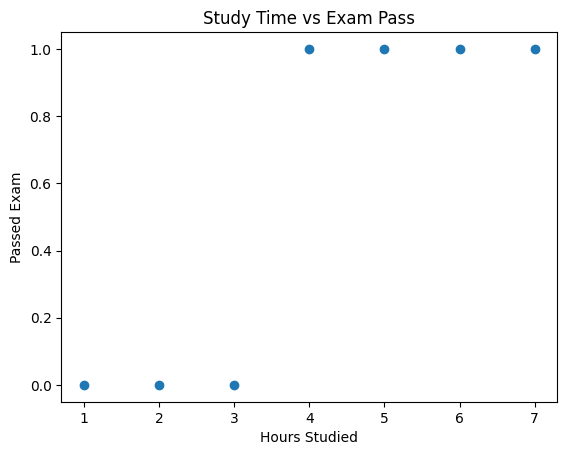

In [23]:
# Show a visualization (scatter plot) in relation to PASS or FAIL.
# PASS or FAIL is driven by the fact that 'Passed Exam' was used for the Y-axis
# Using data headers (that were previously defined) in order to title the X and Y axis of the chart

plt.scatter(df['hours_studied'], df['passed_exam'])
plt.xlabel('Hours Studied')
plt.ylabel('Passed Exam')
plt.title('Study Time vs Exam Pass')
plt.show()

In [36]:
# Creates a list of packages this project needs so others can install them easily.

pip freeze > requirements.txt

Note: you may need to restart the kernel to use updated packages.
